In [1]:
import pandas as pd
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_csv('/home/user/Documents/ML Projects/BTC-USD.csv')
df = df[["Date", "Close"]]
df.columns = ["ds", "y"]
df

,ds,y
0,2020-03-04,8755.246094
1,2020-03-05,9078.762695
2,2020-03-06,9122.545898
3,2020-03-07,8909.954102
4,2020-03-08,8108.116211
...,...,...
361,2021-02-28,45137.769531
362,2021-03-01,49631.242188
363,2021-03-02,48378.988281
364,2021-03-03,50538.242188


In [3]:
prophet = Prophet()
prophet.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [4]:
future = prophet.make_future_dataframe(periods=365)
print(future)

            ds
0   2020-03-04
1   2020-03-05
2   2020-03-06
3   2020-03-07
4   2020-03-08
..         ...
726 2022-02-28
727 2022-03-01
728 2022-03-02
729 2022-03-03
730 2022-03-04

[731 rows x 1 columns]


In [5]:
forecast = prophet.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(200)

,ds,yhat,yhat_lower,yhat_upper
531,2021-08-17,112624.292567,103773.337723,121793.958394
532,2021-08-18,113221.797219,104412.371434,122239.033455
533,2021-08-19,113492.378993,104823.439320,122479.386864
534,2021-08-20,113991.419862,105314.700110,122857.988104
535,2021-08-21,114314.643484,105707.064094,123160.658491
...,...,...,...,...
726,2022-02-28,184525.115706,157149.839246,209394.096463
727,2022-03-01,184736.614885,158389.723296,209380.665624
728,2022-03-02,185334.119537,158473.793967,210485.542174
729,2022-03-03,185604.701311,158447.881409,211159.990973


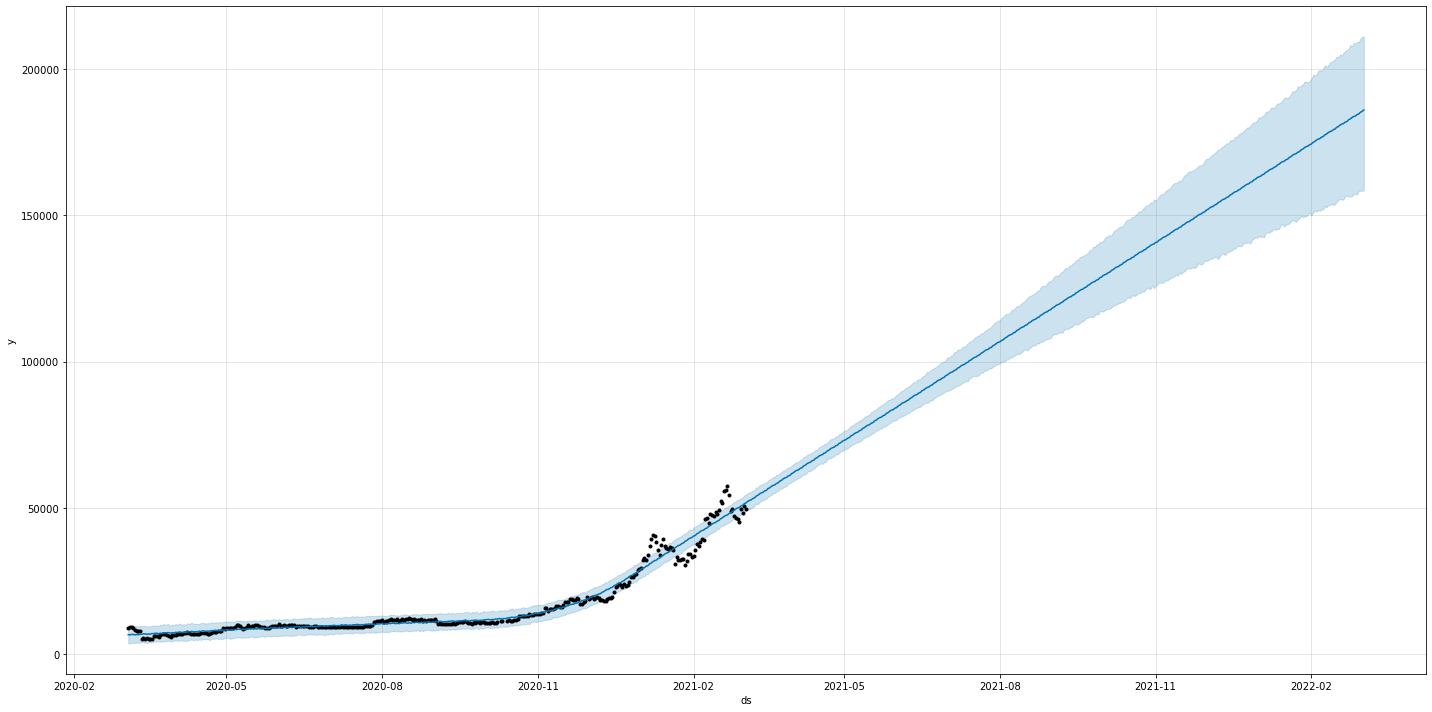

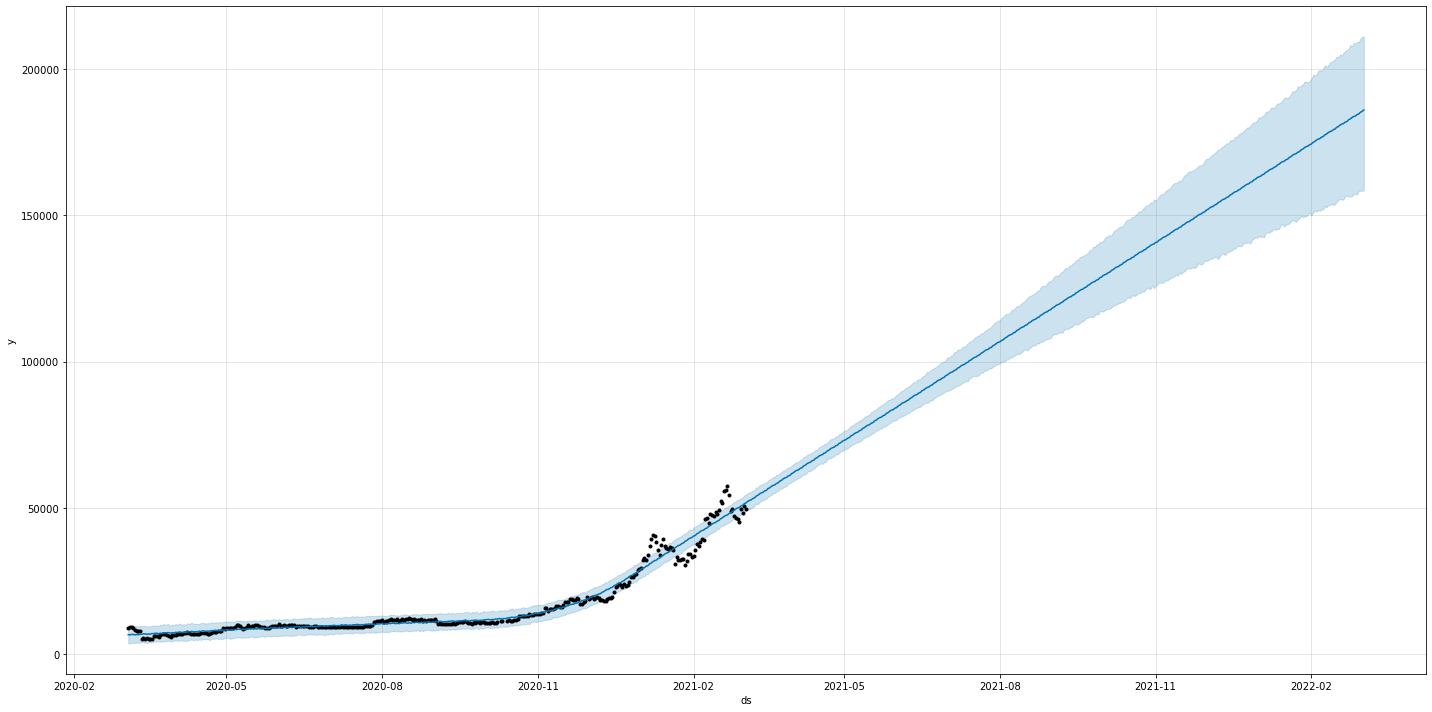

In [6]:
from fbprophet.plot import plot
prophet.plot(forecast, figsize=(20, 10))